I have previously predicted Heart Failure with decision tree, here i will be trying ANN method to see if the accuracy will be better of

In [35]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import regularizers

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Failure Prediction/vectorized_HF_dataset.csv')
dataset.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.244898,0.7,0.479270,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.428571,0.8,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [6]:
input_columns = list(dataset.columns)[0:-1]
target_columns = 'HeartDisease'

In [7]:
_inputs = dataset[input_columns].copy()
_targets = dataset[target_columns].copy()

In [8]:
_inputs.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
_targets

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( _inputs, _targets, test_size=0.35, random_state=42)

In [97]:
# Defining The model

model = models.Sequential()
model.add(layers.Dense(400, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 400)               8400      
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_82 (Dense)            (None, 200)               80200     
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_83 (Dense)            (None, 1)                 201       
                                                                 
Total params: 88,801
Trainable params: 88,801
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Using Tensorflow callback to save the best model

import keras
callbacks_list = [ 
                  keras.callbacks.EarlyStopping(monitor='acc',
                                                 patience=1,
                                                ),
                  keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/Heart Failure Prediction/my_best_model.h5',
                                                  monitor='val_loss',
                                                  save_best_only=True,
                  )
]

In [99]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [100]:
history = model.fit(X_train, y_train,
                    epochs=5, 
                    callbacks=callbacks_list,
                    validation_data=(X_val, y_val))

Epoch 1/5
19/19 [==============================] - 2s 28ms/step - loss: 0.7106 - acc: 0.7953 - val_loss: 0.5623 - val_acc: 0.8354
Epoch 2/5
19/19 [==============================] - 0s 7ms/step - loss: 0.5642 - acc: 0.8507 - val_loss: 0.5062 - val_acc: 0.8509
Epoch 3/5
19/19 [==============================] - 0s 9ms/step - loss: 0.5334 - acc: 0.8523 - val_loss: 0.4492 - val_acc: 0.8882
Epoch 4/5
19/19 [==============================] - 0s 8ms/step - loss: 0.4972 - acc: 0.8490 - val_loss: 0.4197 - val_acc: 0.8851


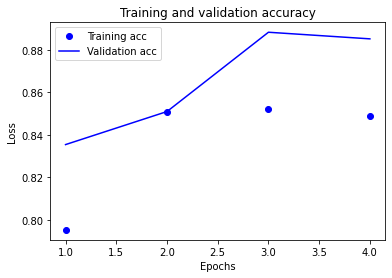

In [101]:
# Plotting the result

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

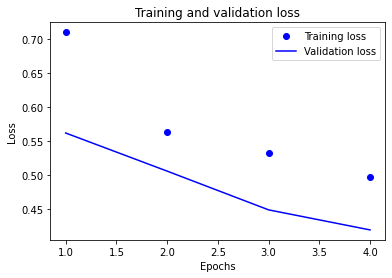

In [102]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()